At an angle $\theta$ from the loaded end, the horizontal load P induces a moment proportional to $sin(\theta)$. Since this bending moment is directly connected to $\sigma_{\theta\theta}$, so it must be true that $\sigma_{\theta\theta}$ must also be proportional to $sin(\theta)$. Now, for any generic Airy stress function, we have the following form for $\sigma_{\theta\theta}$:
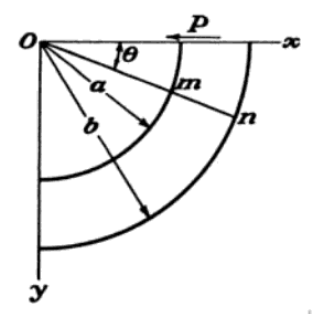

In [3]:
from polarUtilities import *
from IPython.display import Math, Latex

f = Function('f')(r, theta)

sigma_tt(f)

Derivative(f(r, theta), (r, 2))

Since the expression of $\sigma_{\theta\theta}$ involves only the derivatives with respect to $r$, we can immediately conclude that the Airy stress function required to solve this problem must have the following form:

In [4]:
g = Function('g')(r)
phi = g*sin(theta)
display(Math(r'\phi = {}'.format(latex(phi))))

<IPython.core.display.Math object>

We now solve the biharmonic equation to obtain the solution for $g(r)$:

In [6]:
dsolve(polarbiharmonic(phi))

Eq(g(r), C1/r + C2*r + C3*r**3 + C4*r*log(r))

In [7]:
A, B, C, D = symbols('A, B, C, D')

phi = (A*r**3 + B/r + C*r + D*r*log(r))*sin(theta)
display(Math(r'\phi = {}'.format(latex(phi))))

<IPython.core.display.Math object>

Then the stress components become:

In [9]:
sigmarr = sigma_rr(phi)
sigmatt = sigma_tt(phi)
sigmart = sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We would like to use the following boundary conditions:
\begin{align}
\sigma_{rr} &= 0 \quad \text{at $r=a$ and $r=b$} \\
\int_a^b \sigma_{rt} \; dr &= P \quad \text{at $\theta = 0$} 
\end{align}

In [10]:
a, b, P = symbols('a, b, P')

lhs = sigmarr.subs(r,a)
rhs = 0
eq1 = Eq(lhs,rhs)
display(eq1)

lhs = sigmarr.subs(r,b)
rhs = 0
eq2 = Eq(lhs,rhs)
display(eq2)

lhs = integrate(sigmart,(r,a,b)).subs(theta,0)
rhs = P
eq3 = Eq(lhs,rhs)
display(eq3)

Eq(2*A*a*sin(theta) - 2*B*sin(theta)/a**3 + D*sin(theta)/a, 0)

Eq(2*A*b*sin(theta) - 2*B*sin(theta)/b**3 + D*sin(theta)/b, 0)

Eq(A*a**2 - A*b**2 - B/b**2 + B/a**2 + D*log(a) - D*log(b), P)

Next, we solve for the unknowns $A, B,$ and $D$ as follows:

In [12]:
soln, = linsolve([eq1,eq2,eq3],(A,B,D))

In [13]:
Avalue = soln[0]
Bvalue = soln[1]
Dvalue = soln[2]

display(Avalue)
display(Bvalue)
display(Dvalue)

-P/(2*a**2*log(a) - 2*a**2*log(b) - 2*a**2 + 2*b**2*log(a) - 2*b**2*log(b) + 2*b**2)

P*a**2*b**2/(2*(a**2*log(a) - a**2*log(b) - a**2 + b**2*log(a) - b**2*log(b) + b**2))

P*(a**2 + b**2)/(a**2*log(a) - a**2*log(b) - a**2 + b**2*log(a) - b**2*log(b) + b**2)

In [14]:
sigmarr_ans = sigmarr.subs([(A,Avalue),(B,Bvalue),(D,Dvalue)]).simplify()
sigmatt_ans = sigmatt.subs([(A,Avalue),(B,Bvalue),(D,Dvalue)]).simplify()
sigmart_ans = sigmart.subs([(A,Avalue),(B,Bvalue),(D,Dvalue)]).simplify()

display(Math(r'\sigma_{{rr}}^{{\rm ans}} = {}'.format(latex(sigmarr_ans))))
display(Math(r'\sigma_{{\theta\theta}}^{{\rm ans}} = {}'.format(latex(sigmatt_ans))))
display(Math(r'\sigma_{{r\theta}}^{{\rm ans}} = {}'.format(latex(sigmart_ans))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>